In [1]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.
import seaborn as sns   # generar visualizaciones de gráficos

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.linear_model import LinearRegression # Modelo de Regresión Lineal
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.

# Deep Learning

import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.

In [7]:
# Leemos el archivo csv con los datos

df_central = pd.read_csv('https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv') 

df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [8]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25066 entries, 0 to 25065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25066 non-null  int64  
 1   Fecha          25066 non-null  object 
 2   Period         25066 non-null  int64  
 3   PREVISION      25066 non-null  float64
 4   E_SIMEL        25066 non-null  float64
 5   DESVIO         25066 non-null  float64
 6   f_PREV_HIGH    25066 non-null  int64  
 7   f_PREV_LOW     25066 non-null  int64  
 8   f_RUN          25066 non-null  int64  
 9   Dia_Semana     25066 non-null  int64  
 10  Es_fin_semana  25066 non-null  bool   
 11  Año            25066 non-null  int64  
 12  Mes            25066 non-null  int64  
 13  Día            25066 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(1)
memory usage: 2.5+ MB


c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


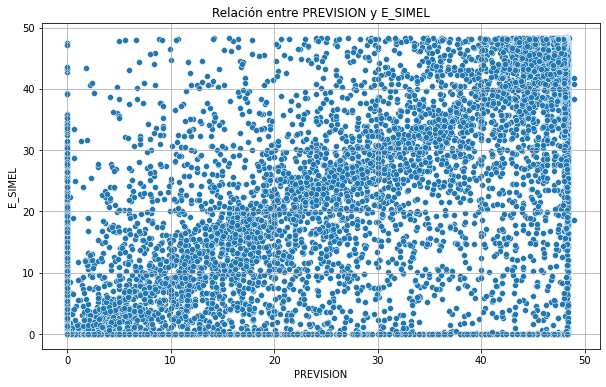

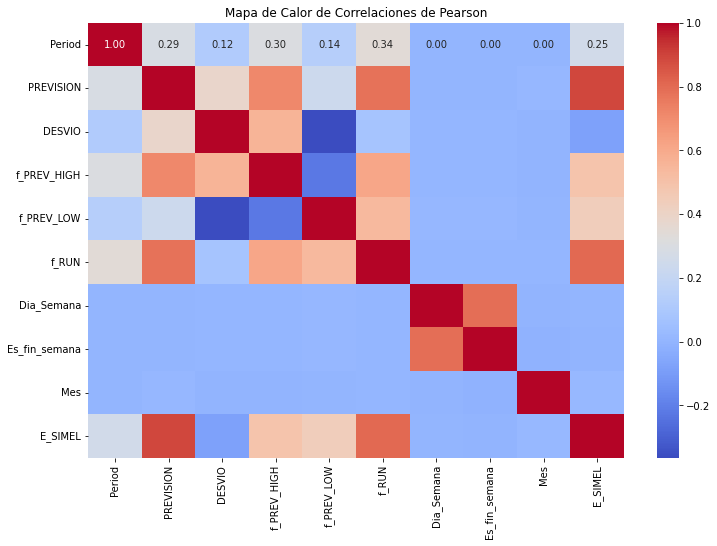

DESVIO          -0.081421
Es_fin_semana   -0.003424
Dia_Semana      -0.000052
Mes              0.016508
Period           0.253824
f_PREV_LOW       0.435761
f_PREV_HIGH      0.492146
f_RUN            0.803932
PREVISION        0.888352
E_SIMEL          1.000000
Name: E_SIMEL, dtype: float64


In [9]:
# Empezamos con la visualización de la relación de las varibles de que disponemos


# Seleccionamos las variables independientes para análisis

variables_independientes = ['Period', 'PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_PREV_LOW', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Mes']

# Calculamos el coeficiente de correlación de Pearson para las variables seleccionadas con respecto a 'E_SIMEL', variable objetivo

correlaciones = df_central[variables_independientes + ['E_SIMEL']].corr()['E_SIMEL'].sort_values()


# Creamos un  gráficos de dispersión para la variable 'PREVISION' (variable que sabemos que tiene más peso) vs 'E_SIMEL'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_central, x='PREVISION', y='E_SIMEL')
plt.title('Relación entre PREVISION y E_SIMEL')
plt.xlabel('PREVISION')
plt.ylabel('E_SIMEL')
plt.grid(True)
plt.show()


# Matriz de correlación de Pearson para las variables seleccionadas y 'E_SIMEL'

matriz_correlaciones = df_central[variables_independientes + ['E_SIMEL']].corr()

# Creamos un mapa de calor para visualizar las correlaciones e imprimimos las correlaciones

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones de Pearson')
plt.show()

print(correlaciones)


In [10]:
# ELIMINAMOS COLUMNAS QUE NO APORTAN VALOR Y ALGUNAS QUE NO PODREMOS TENER PARA LA PREVISION
df_central.drop(['Unnamed: 0', 'DESVIO', 'f_PREV_HIGH', 'f_PREV_LOW', 'f_RUN'], axis=1, inplace=True)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,4,False,2021,1,1


In [11]:
df_central.describe()

,Period,PREVISION,E_SIMEL,Dia_Semana,Año,Mes,Día
count,25066.000000,25066.000000,25066.000000,25066.000000,25066.000000,25066.000000,25066.000000
mean,12.500319,11.204947,9.634421,3.003072,2021.955478,6.308027,15.594710
std,6.921158,17.959982,16.628467,2.003336,0.806524,3.344760,8.784945
min,1.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,1.000000
25%,7.000000,0.000000,0.000000,1.000000,2021.000000,3.000000,8.000000
50%,13.000000,0.000000,0.000000,3.000000,2022.000000,6.000000,15.000000
75%,18.000000,20.000000,13.984000,5.000000,2023.000000,9.000000,23.000000
max,25.000000,49.000000,48.400000,6.000000,2023.000000,12.000000,31.000000


In [12]:
# CONVERTIMOS LA COLUMNA'Fecha' A DATETIME Y VEMOS EL TIPO DE DATOS QUE NOS QUEDA AL DATAFRAME

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

df_central.dtypes


Fecha            datetime64[ns]
Period                    int64
PREVISION               float64
E_SIMEL                 float64
Dia_Semana                int64
Es_fin_semana              bool
Año                       int64
Mes                       int64
Día                       int64
dtype: object

In [13]:
# CALCULAMOS LA MATRIZ DE CORRELACION PARA VER LA RELACION ENTRE LAS VARIABLES

correlation_matrix = df_central.corr()

correlation_matrix


,Fecha,Period,PREVISION,E_SIMEL,Dia_Semana,Es_fin_semana,Año,Mes,Día
Fecha,1.000000,0.000320,0.023256,0.018925,-0.001782,-0.001856,0.942049,0.253417,0.010232
Period,0.000320,1.000000,0.290188,0.253824,0.000030,0.000009,0.000203,0.000350,0.000162
PREVISION,0.023256,0.290188,1.000000,0.888352,0.003017,-0.000007,0.020157,0.013305,-0.009405
E_SIMEL,0.018925,0.253824,0.888352,1.000000,-0.000052,-0.003424,0.014142,0.016508,0.003546
Dia_Semana,-0.001782,0.000030,0.003017,-0.000052,1.000000,0.791250,-0.000533,-0.003880,0.000669
Es_fin_semana,-0.001856,0.000009,-0.000007,-0.003424,0.791250,1.000000,0.000936,-0.008562,0.003363
Año,0.942049,0.000203,0.020157,0.014142,-0.000533,0.000936,1.000000,-0.084510,-0.018032
Mes,0.253417,0.000350,0.013305,0.016508,-0.003880,-0.008562,-0.084510,1.000000,-0.003364
Día,0.010232,0.000162,-0.009405,0.003546,0.000669,0.003363,-0.018032,-0.003364,1.000000


In [8]:
"""
Podemos ver que las variables con más peso respecto a la variable objetivo 'E_SIMEL' son las variables 'PREVISION' y 'PERIOD'.
Por lo tanto vamos a ejecutar un modelo de Regresion Lineal para ver como predice el modelo en el conjunto de prueba, con estas variables
"""

"\nPodemos ver que las variables con más peso respecto a la variable objetivo 'E_SIMEL' son las variables 'PREVISION' y 'PERIOD'.\nPor lo tanto vamos a ejecutar un modelo de Regresion Lineal para ver como predice el modelo con estas variables\n"

In [9]:
# SELECCIONAMOS LAS VARIABLES INDEPENDIENTES Y LA VARIABLE OBJETIVO

X = df_central[['PREVISION', 'Period']]
y = df_central['E_SIMEL']

# DIVIDIMOS LOS DATOS ENTRE ENTRENAMIENTO (80%) Y PRUEBA (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CREAMOS EL MODELO DE REGRESION LINEAL

model = LinearRegression()

# ENTRENAMOS EL MODELO CON LOS DATOS DE ENTRENAMIENTO

model.fit(X_train, y_train)

# REALIZAMOS LAS PREDICCIONES CON EL CONJUNTO DE PRUEBA

y_pred = model.predict(X_test)

# PARA TENER UNA IDEA DEL RESULTADO DE LA PREDICCION, CALCULAMOS EL ERROR CUADRATIVO MEDIO (MSE)
# Y EL COEFICIENTE DE DETERMINACION (R^2)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)



(52.526587774072034, 0.807557714039014)

In [10]:
"""
A priori podemos ver que los resultados son relativamente buenos. La desviacion de los erros cuadráticos medios (MSE) no son demasiado elevados dados los 
datos que estamos manejando en un margen del mínimo al máximo de 48 puntos y el coeficiente de determinacion a 0.808 cercano a 1 nos explica
el 81% por ciento de la variabilidad de la variable E_SIMEL
"""

'\nA priori podemos ver que los resultados son relativamente buenos. La desviacion de los erros cuadráticos medios (MSE) no son demasiado elevados dados los \ndatos que estamos manejando en un margen del mínimo al máximo de 48 puntos y el coeficiente de determinacion a 0.808 cercano a 1 nos explica\nel 81% por ciento de la variabilidad de la variable E_SIMEL\n'

In [11]:
"""
Vamos a explorar un poco más los datos haciendo una validación cruzada de 5 folds y obtendremos la media y la desviación
estándard del coeficiente de determinación.

"""

# VALIDACION CRUZADA DE 5 FOLDS

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# CALCULO DEL PROMEDIO Y LA DESVIACIÓN ESTÁNDARD
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

(cv_mean, cv_std)



(0.7916015032977697, 0.08431055416891488)

In [12]:
"""
Los resultados continúan ser relativamente buenos. La media del coeficiente de determinación, cv_mean,  es cercano al del modelo de Regresion y
la desviación estándard, nos indica una variabilidad moderada obtenida a través de los diferentes folds.

"""

'\nLos resultados continúan ser relativamente buenos. La media del coeficiente de determinación, cv_mean,  es cercano al del modelo de Regresion y\nla desviación estándard, nos indica una variabilidad moderada obtenida a través de los diferentes folds.\n\n'

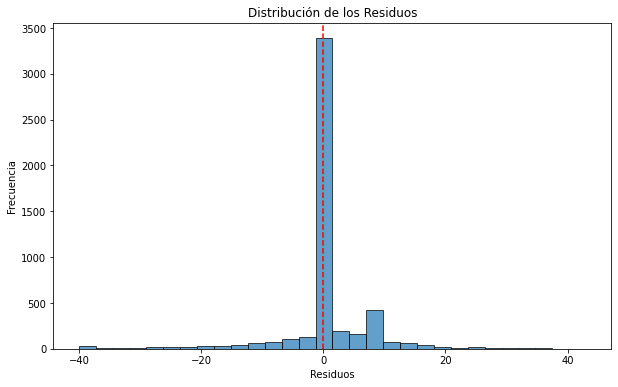

(0.16263558786842394, 7.245697857324078)

In [13]:
# VAMOS A VISUALIZAR LOS RESIDUOS

# CALCULO DE LOS RESIDUOS

residuos = y_test - y_pred

# VISUALIZAMOS LA DISTRIBUCION DE LOS RESIDUOS

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()

# MEDIA I DESVIACION ESTANDARD DE LOS RESIDUOS

mean_residuos = np.mean(residuos)
std_residuos = np.std(residuos)

(mean_residuos, std_residuos)


In [14]:
"""
Vemos muy significativo la gran cantidad de residuos en 0 y esto es debido a la naturaleza de los datos,
ya que la mayor parte de las horas del día tenemos una producción de energía en 0 y tmabién previsiones 0,
lo que nos da a entender de que puede haber un sesgo a la hora de la predicción del modelo
"""

'\nVemos muy significativo la gran cantidad de residuos en 0 y esto es debido a la naturaleza de los datos,\nya que la mayor parte de las horas del día tenemos una producción de energía en 0 y tmabién previsiones 0,\nlo que nos da a entender de que puede haber un sesgo a la hora de la predicción del modelo\n'

In [22]:
# VAMOS A REALIZAR UN ANÁLISI MÁS DETALLADO FILTRANDO SUBCONJUNOS EN QUE PREVISION NO SEA CERO PARA PODER VER
# HASTA DONDE LLEGA EL POSIBLE SESGO DE LA CANTIDAD IMPORTANTE DE CEROS.

X_test_filtered = X_test[(X_test['PREVISION'] > 0)]
y_test_filtered = y_test[X_test_filtered.index]

# REALIZAMOS LAS PREDICIONES EN EL SUBCONJUNTO FILTRADO CON EL MODELO ENTRENADO
y_pred_filtered = model.predict(X_test_filtered)

# Y EVALUAMOS EL RESULTADO DE LAS PREDICCIONES
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

(cv_scores.mean(), cv_scores.mean(), mse_filtered, r2_filtered)

print("Media del coeficiente de determinación de la validación cruzada: ",cv_mean)
print("Desviación estándard del coefiente de determinación de la validación cruzada: ", cv_std)
print('MSE del modelo inicial: ', mse)
print("Coeficiente de determinación, r2, del modelo inicial: ", r2)
print("MSE del subconjunto filtrado: ", mse_filtered)
print("r2 del subconjunto filtrado: ", r2_filtered)


Media del coeficiente de determinación de la validación cruzada:  0.7916015032977697
Desviación estándard del coefiente de determinación de la validación cruzada:  0.08431055416891488
MSE del modelo inicial:  52.526587774072034
Coeficiente de determinación, r2, del modelo inicial:  0.807557714039014
MSE del subconjunto filtrado:  145.02210942579887
r2 del subconjunto filtrado:  0.5466624614330693


In [16]:
"""
El resultado nos confirma el sesgo en las predicciones del modelo en el conjunto entero de datos: el valor del MSE,
la media del error cuadrático ha subido considerablemente dando a entender la subida del error en la predicción, y el coeficiente de determinción ya 
está en torno al 50% lo que nos indica que el modelo tiene una capacidad predictiva moderada.
"""

'\nEl resultado nos confirma el sesgo en las predicciones del modelo en el conjunto entero de datos: el valor del MSE\nha subido considerablemente dando a entender la subida del error en la predicción, y el coeficiente de determinción ya \nestá en torno al 50% lo que nos indica que el modelo tiene una capacidad predictiva moderada.\n'

In [17]:
"""
A partir de estos resultados decidimos explorar otros modelos 
"""

'\nA partir de estos resultados decidimos explorar otros modelos \n'